<a href="https://colab.research.google.com/github/danielrodriguez007/Data_Analysis/blob/main/Project_BLT_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/Colab Notebooks/Kaggle'

In [3]:
!kaggle datasets download -d jaforero/baloto-colombia

  0% 0.00/10.5k [00:00<?, ?B/s]
100% 10.5k/10.5k [00:00<00:00, 15.6MB/s]


In [4]:
!unzip '/content/baloto-colombia.zip' && rm '/content/baloto-colombia.zip'

Archive:  /content/baloto-colombia.zip
  inflating: baloto.csv              
  inflating: revancha.csv            


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2023/baloto.csv')
data.head()

,Date,C1,C2,C3,C4,C5,SB
0,4/22/2017,15,28,36,37,41,10
1,4/26/2017,1,2,25,31,33,14
2,4/29/2017,6,19,25,28,36,1
3,5/3/2017,5,6,7,12,37,6
4,5/6/2017,1,20,36,39,43,10


In [42]:
data["sum"] = data.iloc[:, 1:7].sum(axis=1)
data["range"] = data.iloc[:, 1:7].max(axis=1) - data.iloc[:, 1:7].min(axis=1)
data["max"] = data.iloc[:, 1:7].max(axis=1)
data["min"] = data.iloc[:, 1:7].min(axis=1)
data.tail()

,Date,C1,C2,C3,C4,C5,SB,sum,range,max,min,sb_sum
598,2/22/2023,13,14,6,8,22,12,75,16,22,6,5072
599,2/25/2023,32,35,14,20,12,9,122,26,35,9,5081
600,3/1/2023,16,36,39,42,23,11,167,31,42,11,5092
601,3/4/2023,5,33,4,12,24,12,90,29,33,4,5104
602,3/8/2023,26,41,35,24,36,7,169,34,41,7,5111


<ipython-input-43-69c2ce693d87>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), linecolor="white", linewidths=2, annot=True,cmap='inferno')


<Axes: >

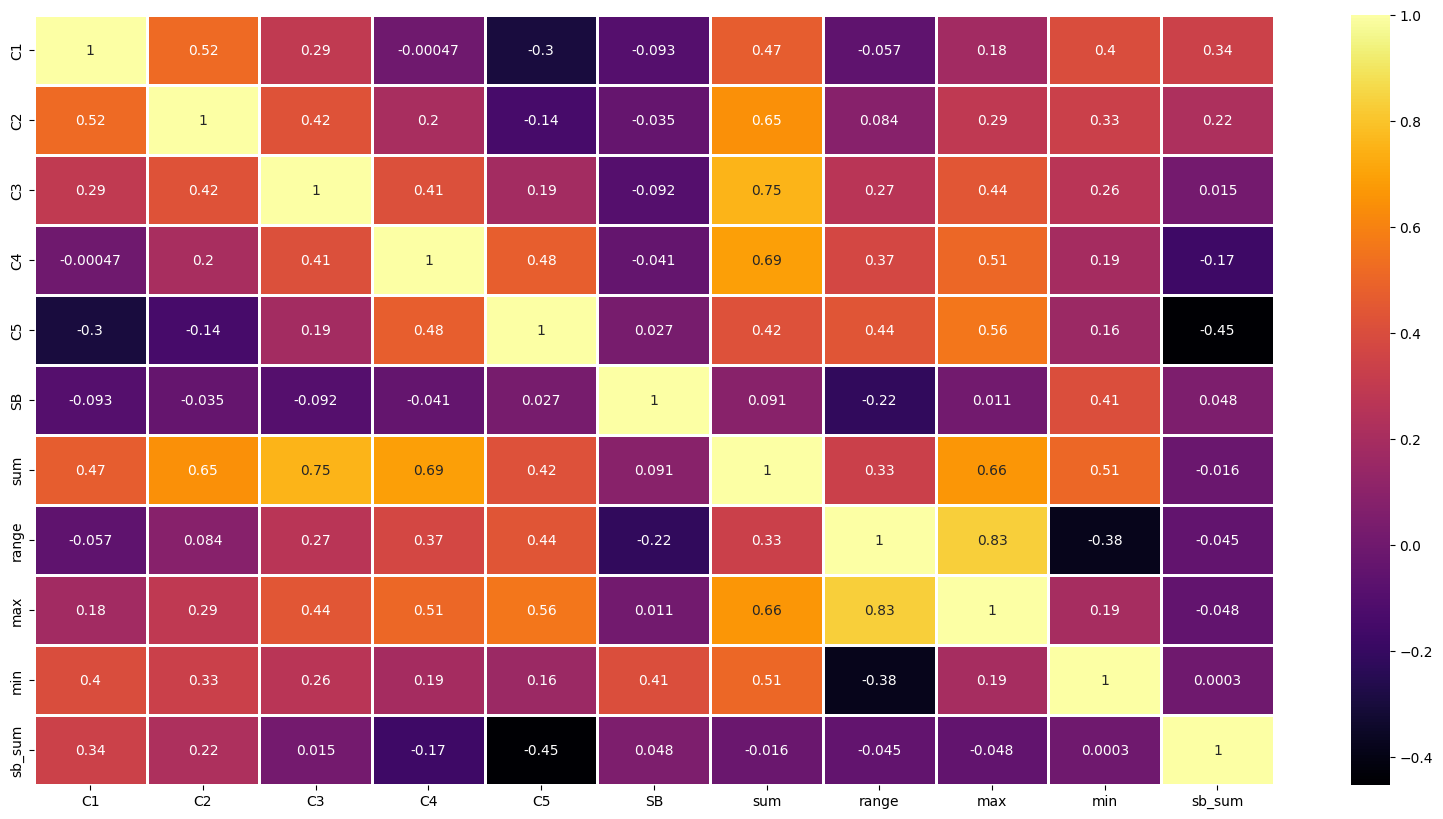

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), linecolor="white", linewidths=2, annot=True,cmap='inferno')

In [53]:
#With Linear Regression

lastResult = [24,35,20,29,11,2]
features = np.array([[110,17,43,1]])
random_SB = np.random.randint(16)
models = []

for i in range(1,6):
  x = data[["sum", "range", "max", "min"]]
  y = data.iloc[:,i]
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
  model = LinearRegression()
  model.fit(x_train,y_train)
  models.append(model)

next_numbers_lr = []
for j in range(5):
    model = models[j]
    next_number_lr = model.predict(features)
    next_numbers_lr.append(int(round(next_number_lr[0])))
next_numbers_lr.append(random_SB)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [56]:
#With Random Forest Regressor
models = []

for i in range(1,6):
  x = data[["sum", "range", "max", "min"]]
  y = data.iloc[:,i]
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
  model = RandomForestRegressor()
  model.fit(x_train,y_train)
  models.append(model)

next_numbers_rf = []
for j in range(5):
    model = models[j]
    next_number_rf = model.predict(features)
    next_numbers_rf.append(int(round(next_number_rf[0])))
next_numbers_rf.append(random_SB)    

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [57]:
#With SVR
models = []

for i in range(1,6):
  x = data[["sum", "range", "max", "min"]]
  y = data.iloc[:,i]
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
  model = SVR()
  model.fit(x_train,y_train)
  models.append(model)

next_numbers_SvR = []
for j in range(5):
    model = models[j]
    next_number_SvR = model.predict(features)
    next_numbers_SvR.append(int(round(next_number_SvR[0]))) 
next_numbers_SvR.append(random_SB)    

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [58]:
#With KNeighbors
models = []

for i in range(1,6):
  x = data[["sum", "range", "max", "min"]]
  y = data.iloc[:,i]
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
  model = KNeighborsRegressor()
  model.fit(x_train,y_train)
  models.append(model)

next_numbers_knn = []
for j in range(5):
    model = models[j]
    next_number_knn = model.predict(features)
    next_numbers_knn.append(int(round(next_number_knn[0]))) 
next_numbers_knn.append(random_SB)    

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [59]:
print("Numbers with: ","\n","\n",
      "Last Result🤑:            ",lastResult,"\n",
      "Linear Regression📊:      ",next_numbers_lr,"\n",
      "Random Forest Regressor🌳:", next_numbers_rf,"\n",
      "SVR↗️:                    ", next_numbers_SvR,"\n",
      "KNeighbors Regressor🏘️:   ", next_numbers_knn)

Numbers with:  
 
 Last Result🤑:             [24, 35, 20, 29, 11, 2] 
 Linear Regression📊:       [11, 14, 18, 23, 33, 12] 
 Random Forest Regressor🌳: [6, 11, 19, 27, 42, 12] 
 SVR↗️:                     [7, 13, 20, 26, 34, 12] 
 KNeighbors Regressor🏘️:    [11, 18, 20, 21, 31, 12]
